In [52]:
import cv2 as cv
from glob import glob
import os
import random
from ultralytics import YOLO

In [2]:
try:
    import lap
except ModuleNotFoundError:
    print("The 'lap' package is required for optimal tracking. Please install it using 'pip install lap'.")
    # You could also provide alternative tracking options or exit gracefully here.


# Pre-Trained YOLOv8

The regular YOLOv8 training weights do not contain a number_plate class and cannot be used directly for a number plate detection:

In [2]:
# read in video paths
videos = glob('/Users/coutinhonobre/Projects/yolo/tcc_deteccao_placas/video/*.mp4')
print(videos)

['/Users/coutinhonobre/Projects/yolo/tcc_deteccao_placas/video/traffic.mp4', '/Users/coutinhonobre/Projects/yolo/tcc_deteccao_placas/video/road.mp4']


In [4]:
# pick pre-trained model
model_pretrained = YOLO('yolov8n.pt')

In [6]:
import cv2
from ultralytics import YOLO

# Verifique o caminho do vídeo e use o caminho absoluto se necessário
video_path = '/Users/coutinhonobre/Projects/yolo/tcc_deteccao_placas/video/traffic.mp4'

# Tente abrir o vídeo
video = cv2.VideoCapture(video_path)

if not video.isOpened():
    print(f"Erro ao abrir o vídeo: {video_path}")
else:
    while True:
        check, img = video.read()
        if not check:
            print("Não foi possível ler o frame do vídeo.")
            break
        
        resultado = model_pretrained.predict(img, verbose=False)

        for obj in resultado:
            nomes = obj.names
            for item in obj.boxes:
                x1, y1, x2, y2 = item.xyxy[0]
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                cls = int(item.cls[0])
                nomeClasse = nomes[cls]
                conf = round(float(item.conf[0]), 2)
                texto = f'{nomeClasse} - {conf}'
                cv2.putText(img, texto, (x1, y1 - 20), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2)
                cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 255), 5)

        cv2.imshow('IMG', img)
        if cv2.waitKey(1) == 27:
            break

    video.release()
    cv2.destroyAllWindows()


2024-07-22 12:13:44.560 Python[96405:5179204] WARNING: Secure coding is automatically enabled for restorable state! However, not on all supported macOS versions of this application. Opt-in to secure coding explicitly by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState:.


: 

# Retraining YOLOv8

```yaml
# Número de classes que você deseja detectar
nc: 1  

# Define o caminho para o diretório com suas imagens
train: /Users/coutinhonobre/Projects/yolo/tcc_deteccao_placas/dataset/train/

# Define o caminho para o diretório com as anotações dos objetos (em formato YOLO)
val: /Users/coutinhonobre/Projects/yolo/tcc_deteccao_placas/dataset/valid/   

# Define o caminho para o diretório com as imagens de test
test: /Users/coutinhonobre/Projects/yolo/tcc_deteccao_placas/dataset/test/

# Nomes das classes (um nome por linha)
names: 
  0: 'Plate'  

save_dir: /Users/coutinhonobre/Projects/yolo/tcc_deteccao_placas/result/


In [6]:
# unzip downloaded dataset to `./datasets`
dataset = '/Users/coutinhonobre/Projects/yolo/tcc_deteccao_placas/dataset/data.yml'

# load a model
# backbone = YOLO("yolov8n.yaml")  # build a new model from scratch
backbone = YOLO("yolov8n.pt")  # load a pre-trained model (recommended for training)

In [7]:
# Use the model
results = backbone.train(data='/Users/coutinhonobre/Projects/yolo/tcc_deteccao_placas/dataset/data.yml', epochs=30, imgsz=640, workers=2, device='mps')

New https://pypi.org/project/ultralytics/8.2.64 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.27 🚀 Python-3.9.6 torch-2.1.2 MPS (Apple M1 Pro)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/Users/coutinhonobre/Projects/yolo/tcc_deteccao_placas/dataset/data.yml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=mps, workers=2, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, emb

train: Scanning /Users/coutinhonobre/Projects/yolo/tcc_deteccao_placas/dataset/train/labels.cache... 1800 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1800/1800 [00:00<?, ?it/s]
val: Scanning /Users/coutinhonobre/Projects/yolo/tcc_deteccao_placas/dataset/valid/labels.cache... 900 images, 0 backgrounds, 0 corrupt: 100%|██████████| 900/900 [00:00<?, ?it/s]


Plotting labels to runs/detect/train7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train7
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G      1.417      2.827      0.972         18        640: 100%|██████████| 113/113 [06:50<00:00,  3.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/29 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   3%|▎         | 1/29 [00:17<08:13, 17.62s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   7%|▋         | 2/29 [00:26<05:35, 12.43s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  10%|█         | 3/29 [00:35<04:40, 10.80s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 4/29 [00:43<04:09,  9.96s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  17%|█▋        | 5/29 [00:52<03:45,  9.40s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  21%|██        | 6/29 [00:59<03:18,  8.63s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  24%|██▍       | 7/29 [01:09<03:18,  9.03s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  28%|██▊       | 8/29 [01:16<02:57,  8.47s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  31%|███       | 9/29 [01:24<02:48,  8.43s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  34%|███▍      | 10/29 [01:33<02:41,  8.52s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 11/29 [01:42<02:35,  8.63s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  41%|████▏     | 12/29 [01:51<02:26,  8.60s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  45%|████▍     | 13/29 [01:59<02:18,  8.65s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  48%|████▊     | 14/29 [02:08<02:11,  8.74s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  52%|█████▏    | 15/29 [02:18<02:05,  8.93s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [02:26<01:53,  8.77s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  59%|█████▊    | 17/29 [02:34<01:40,  8.41s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▏   | 18/29 [02:42<01:30,  8.24s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  66%|██████▌   | 19/29 [02:51<01:25,  8.56s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  69%|██████▉   | 20/29 [02:59<01:15,  8.37s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  72%|███████▏  | 21/29 [03:08<01:09,  8.67s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  76%|███████▌  | 22/29 [03:17<01:01,  8.75s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  79%|███████▉  | 23/29 [03:29<00:57,  9.58s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  83%|████████▎ | 24/29 [03:40<00:51, 10.21s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 25/29 [03:50<00:40, 10.11s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  90%|████████▉ | 26/29 [04:01<00:31, 10.49s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [04:41<00:00,  9.72s/it]


                   all        900        905   7.18e-05    0.00552    7.9e-05   4.24e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30         0G      1.261      1.294     0.9117         12        640: 100%|██████████| 113/113 [07:24<00:00,  3.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/29 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   3%|▎         | 1/29 [00:11<05:14, 11.24s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   7%|▋         | 2/29 [00:22<05:00, 11.15s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  10%|█         | 3/29 [00:31<04:21, 10.06s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 4/29 [00:42<04:28, 10.75s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  17%|█▋        | 5/29 [00:54<04:22, 10.94s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  21%|██        | 6/29 [01:05<04:17, 11.18s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  24%|██▍       | 7/29 [01:12<03:32,  9.67s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  28%|██▊       | 8/29 [01:21<03:22,  9.65s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  31%|███       | 9/29 [01:31<03:15,  9.75s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  34%|███▍      | 10/29 [01:43<03:17, 10.41s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 11/29 [01:52<02:54,  9.72s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  41%|████▏     | 12/29 [02:03<02:52, 10.17s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  45%|████▍     | 13/29 [02:16<02:55, 10.97s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  48%|████▊     | 14/29 [02:29<02:53, 11.60s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  52%|█████▏    | 15/29 [02:41<02:44, 11.72s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [02:50<02:23, 11.08s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  59%|█████▊    | 17/29 [03:04<02:24, 12.05s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▏   | 18/29 [03:13<02:00, 11.00s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  66%|██████▌   | 19/29 [03:26<01:55, 11.55s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  69%|██████▉   | 20/29 [03:34<01:33, 10.39s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  72%|███████▏  | 21/29 [03:44<01:22, 10.33s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  79%|███████▉  | 23/29 [04:15<01:20, 13.36s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  83%|████████▎ | 24/29 [04:24<01:00, 12.06s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  90%|████████▉ | 26/29 [04:41<00:30, 10.16s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  93%|█████████▎| 27/29 [04:48<00:18,  9.13s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [05:02<00:00, 10.43s/it]


                   all        900        905    5.5e-05    0.00221   2.76e-05   5.51e-06

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30         0G      1.203     0.9074     0.9022          9        640: 100%|██████████| 113/113 [07:01<00:00,  3.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/29 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   3%|▎         | 1/29 [00:12<05:51, 12.54s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   7%|▋         | 2/29 [00:22<04:55, 10.95s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  10%|█         | 3/29 [00:33<04:41, 10.83s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 4/29 [00:42<04:15, 10.22s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  17%|█▋        | 5/29 [00:53<04:13, 10.56s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  21%|██        | 6/29 [01:08<04:35, 12.00s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  24%|██▍       | 7/29 [01:17<04:03, 11.09s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  28%|██▊       | 8/29 [01:30<04:05, 11.71s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  31%|███       | 9/29 [01:42<03:55, 11.77s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  34%|███▍      | 10/29 [01:56<03:56, 12.45s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 11/29 [02:07<03:37, 12.06s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  41%|████▏     | 12/29 [02:19<03:22, 11.93s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  45%|████▍     | 13/29 [02:28<02:58, 11.13s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  48%|████▊     | 14/29 [02:41<02:53, 11.57s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  52%|█████▏    | 15/29 [02:57<03:02, 13.02s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [03:08<02:41, 12.40s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  59%|█████▊    | 17/29 [03:17<02:16, 11.40s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▏   | 18/29 [03:28<02:05, 11.38s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  66%|██████▌   | 19/29 [03:40<01:53, 11.34s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  69%|██████▉   | 20/29 [03:49<01:36, 10.70s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  72%|███████▏  | 21/29 [04:01<01:29, 11.14s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  76%|███████▌  | 22/29 [04:13<01:19, 11.43s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  79%|███████▉  | 23/29 [04:27<01:12, 12.14s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  83%|████████▎ | 24/29 [04:38<00:59, 11.87s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 25/29 [04:50<00:47, 11.90s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  90%|████████▉ | 26/29 [05:03<00:36, 12.17s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  93%|█████████▎| 27/29 [05:16<00:24, 12.33s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [05:33<00:00, 11.49s/it]


                   all        900        905   0.000396    0.00221   0.000207   3.08e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30         0G      1.176      0.754     0.8927         14        640: 100%|██████████| 113/113 [06:40<00:00,  3.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/29 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   3%|▎         | 1/29 [00:17<08:01, 17.18s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   7%|▋         | 2/29 [00:23<04:57, 11.04s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  10%|█         | 3/29 [00:31<04:00,  9.27s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 4/29 [00:40<03:56,  9.47s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  17%|█▋        | 5/29 [00:48<03:28,  8.69s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  21%|██        | 6/29 [00:55<03:11,  8.32s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  24%|██▍       | 7/29 [01:03<02:59,  8.14s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  28%|██▊       | 8/29 [01:09<02:36,  7.45s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  31%|███       | 9/29 [01:16<02:29,  7.45s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  34%|███▍      | 10/29 [01:26<02:36,  8.24s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 11/29 [01:34<02:25,  8.06s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  45%|████▍     | 13/29 [01:51<02:13,  8.32s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  48%|████▊     | 14/29 [02:10<02:50, 11.35s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [02:29<02:11, 10.11s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  79%|███████▉  | 23/29 [03:18<00:41,  6.97s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  83%|████████▎ | 24/29 [03:28<00:40,  8.01s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 25/29 [03:36<00:31,  7.88s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  90%|████████▉ | 26/29 [03:44<00:24,  8.08s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [04:05<00:00,  8.46s/it]


                   all        900        905    0.00589    0.00331   0.000112   8.99e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30         0G      1.128      0.646      0.894         11        640: 100%|██████████| 113/113 [09:09<00:00,  4.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   3%|▎         | 1/29 [00:09<04:22,  9.39s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 11/29 [01:00<01:19,  4.43s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [05:35<00:00, 11.56s/it]


                   all        900        905      0.171      0.161     0.0516     0.0324

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30         0G      1.054     0.5851     0.8724         12        640: 100%|██████████| 113/113 [09:11<00:00,  4.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [02:06<00:00,  4.35s/it]


                   all        900        905     0.0351     0.0309    0.00365    0.00223

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30         0G      1.079     0.5716     0.8782         16        640: 100%|██████████| 113/113 [06:45<00:00,  3.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [02:08<00:00,  4.43s/it]


                   all        900        905      0.023     0.0221    0.00278     0.0017

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30         0G      1.034     0.5347     0.8664          8        640: 100%|██████████| 113/113 [06:56<00:00,  3.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [01:37<00:00,  3.37s/it]


                   all        900        905      0.086     0.0928     0.0203     0.0141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30         0G      1.003     0.5196     0.8674         10        640: 100%|██████████| 113/113 [13:32<00:00,  7.19s/it] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [01:48<00:00,  3.75s/it]


                   all        900        905     0.0717     0.0773     0.0145    0.00893

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30         0G     0.9615     0.4974     0.8598         12        640: 100%|██████████| 113/113 [07:14<00:00,  3.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [01:26<00:00,  2.99s/it]


                   all        900        905       0.64      0.591      0.516      0.353

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30         0G     0.9856     0.4983     0.8556         10        640: 100%|██████████| 113/113 [07:22<00:00,  3.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [01:26<00:00,  2.99s/it]


                   all        900        905      0.212      0.212     0.0824     0.0554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30         0G     0.9594      0.484     0.8565         15        640: 100%|██████████| 113/113 [07:13<00:00,  3.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [01:31<00:00,  3.17s/it]


                   all        900        905      0.199      0.199     0.0725     0.0476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30         0G     0.9299     0.4631     0.8526         10        640: 100%|██████████| 113/113 [07:09<00:00,  3.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [01:42<00:00,  3.53s/it]


                   all        900        905      0.174      0.173     0.0518     0.0361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30         0G     0.9234     0.4574     0.8477         15        640: 100%|██████████| 113/113 [07:08<00:00,  3.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [01:25<00:00,  2.94s/it]


                   all        900        905      0.559      0.539      0.404       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30         0G     0.9087     0.4488     0.8503         15        640: 100%|██████████| 113/113 [07:16<00:00,  3.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [01:22<00:00,  2.83s/it]


                   all        900        905      0.542      0.543      0.424      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30         0G     0.9062     0.4391     0.8495         11        640: 100%|██████████| 113/113 [07:24<00:00,  3.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [01:19<00:00,  2.75s/it]


                   all        900        905      0.456      0.425      0.273      0.189

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30         0G     0.8897     0.4303     0.8434         14        640: 100%|██████████| 113/113 [46:25<00:00, 24.65s/it]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [01:17<00:00,  2.69s/it]


                   all        900        905      0.499      0.469      0.323      0.211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30         0G     0.8751     0.4237     0.8455         18        640: 100%|██████████| 113/113 [06:37<00:00,  3.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [01:22<00:00,  2.86s/it]


                   all        900        905      0.297      0.297      0.135      0.094

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30         0G      0.861     0.4211      0.848         13        640: 100%|██████████| 113/113 [07:25<00:00,  3.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [01:38<00:00,  3.38s/it]


                   all        900        905      0.249      0.236     0.0961     0.0653

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30         0G     0.8483     0.4126     0.8434         11        640: 100%|██████████| 113/113 [07:02<00:00,  3.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [01:18<00:00,  2.70s/it]


                   all        900        905      0.455      0.441      0.289      0.193
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30         0G     0.8426     0.4132     0.8483          8        640: 100%|██████████| 113/113 [08:26<00:00,  4.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [01:29<00:00,  3.08s/it]


                   all        900        905      0.266      0.255      0.124      0.083

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30         0G     0.8338     0.4173     0.8426          7        640: 100%|██████████| 113/113 [07:19<00:00,  3.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [01:26<00:00,  2.98s/it]


                   all        900        905      0.406      0.376      0.237      0.156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30         0G     0.8502     0.4367      0.863          8        640: 100%|██████████| 113/113 [06:59<00:00,  3.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [01:29<00:00,  3.07s/it]


                   all        900        905      0.189      0.186     0.0718     0.0482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30         0G     0.7949     0.3902     0.8433          8        640: 100%|██████████| 113/113 [08:16<00:00,  4.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [05:55<00:00, 12.27s/it]


                   all        900        905      0.507      0.478      0.337      0.223

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30         0G     0.7992     0.3944     0.8456          8        640: 100%|██████████| 113/113 [08:17<00:00,  4.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [01:18<00:00,  2.71s/it]


                   all        900        905      0.409      0.394      0.268      0.177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30         0G     0.7921      0.387     0.8442          8        640: 100%|██████████| 113/113 [06:30<00:00,  3.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [01:20<00:00,  2.79s/it]


                   all        900        905       0.43      0.423      0.262       0.18

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30         0G      0.788     0.3766     0.8354          8        640: 100%|██████████| 113/113 [16:43<00:00,  8.88s/it] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [01:19<00:00,  2.73s/it]


                   all        900        905      0.416       0.39      0.244      0.166

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30         0G     0.7687     0.3665     0.8407          8        640: 100%|██████████| 113/113 [06:17<00:00,  3.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [01:18<00:00,  2.72s/it]


                   all        900        905      0.602      0.573      0.459      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30         0G     0.7412     0.3584      0.832          8        640: 100%|██████████| 113/113 [06:43<00:00,  3.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [01:14<00:00,  2.56s/it]


                   all        900        905      0.558      0.531      0.414      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30         0G     0.7433     0.3581     0.8281          8        640: 100%|██████████| 113/113 [06:43<00:00,  3.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [01:28<00:00,  3.06s/it]


                   all        900        905      0.537      0.507      0.371      0.256

30 epochs completed in 5.697 hours.
Optimizer stripped from runs/detect/train7/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train7/weights/best.pt, 6.2MB

Validating runs/detect/train7/weights/best.pt...
Ultralytics YOLOv8.1.27 🚀 Python-3.9.6 torch-2.1.2 MPS (Apple M1 Pro)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [01:26<00:00,  2.99s/it]


                   all        900        905      0.643      0.598       0.52      0.356
Speed: 2.1ms preprocess, 27.3ms inference, 0.0ms loss, 12.7ms postprocess per image
Results saved to runs/detect/train7


In [7]:
results

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x37e5e8b80>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048,    

In [10]:
results.save_dir

PosixPath('runs/detect/train6')

In [32]:
# Acessando o diretório de salvamento
save_dir = results.save_dir
print(save_dir)


runs/detect/train6


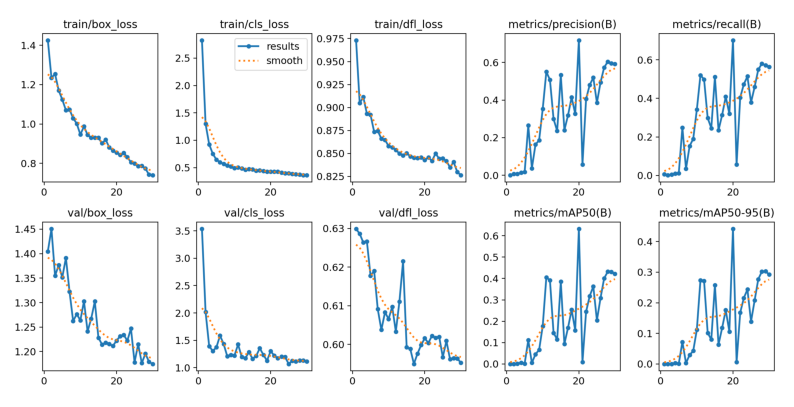

In [40]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

# Passo 2: Carregar a imagem
image_path = str(results.save_dir) + '/results.png'
img = mpimg.imread(image_path)

# Passo 3: Exibir a imagem em um tamanho maior
plt.figure(figsize=(10, 8))  # Ajusta o tamanho da figura (largura, altura)
plt.imshow(img)
plt.axis('off')  # Remove os eixos
plt.show()


In [58]:
# Evaluate the model's performance on the validation set
results = backbone.val()

Ultralytics YOLOv8.1.27 🚀 Python-3.9.6 torch-2.3.1 MPS (Apple M1 Pro)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /Users/coutinhonobre/Projects/yolo/tcc_deteccao_placas/dataset/valid/labels.cache... 900 images, 0 backgrounds, 0 corrupt: 100%|██████████| 900/900 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/57 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 57/57 [01:45<00:00,  1.85s/it]


                   all        900        905      0.714      0.695      0.627      0.439
Speed: 2.5ms preprocess, 47.3ms inference, 0.0ms loss, 19.5ms postprocess per image
Results saved to runs/detect/train62


In [59]:
results

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0xb1cbaeb50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048,    

In [61]:
save_dir_val = results.save_dir
save_dir_val

PosixPath('runs/detect/train62')

In [40]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
def view_image_in_line(image_path):

    # Passo 2: Carregar a imagem
    image_path = image_path
    img = mpimg.imread(image_path)

    # Passo 3: Exibir a imagem em um tamanho maior
    plt.figure(figsize=(10, 8))  # Ajusta o tamanho da figura (largura, altura)
    plt.imshow(img)
    plt.axis('off')  # Remove os eixos
    plt.show()

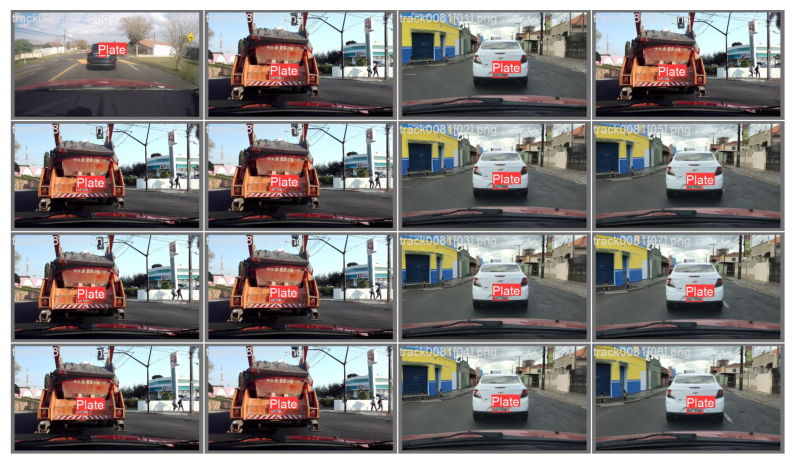

In [65]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

# Passo 2: Carregar a imagem
image_path = str(results.save_dir) + '/val_batch0_labels.jpg'
img = mpimg.imread(image_path)

# Passo 3: Exibir a imagem em um tamanho maior
plt.figure(figsize=(10, 8))  # Ajusta o tamanho da figura (largura, altura)
plt.imshow(img)
plt.axis('off')  # Remove os eixos
plt.show()


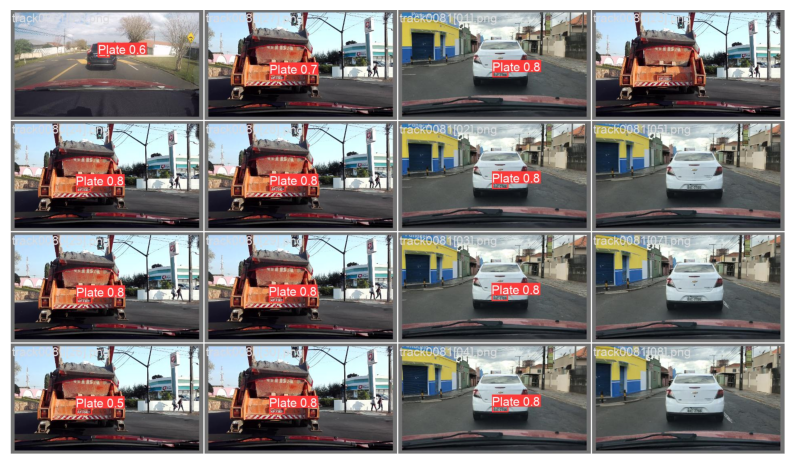

In [66]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

# Passo 2: Carregar a imagem
image_path = str(results.save_dir) + '/val_batch0_pred.jpg'
img = mpimg.imread(image_path)

# Passo 3: Exibir a imagem em um tamanho maior
plt.figure(figsize=(10, 8))  # Ajusta o tamanho da figura (largura, altura)
plt.imshow(img)
plt.axis('off')  # Remove os eixos
plt.show()


In [67]:
# Perform object detection on an image using the model
results = backbone('input/Placa-Mercosul-3.jpg')


image 1/1 /Users/coutinhonobre/Projects/yolo/tcc_deteccao_placas/input/Placa-Mercosul-3.jpg: 448x640 (no detections), 18483.8ms
Speed: 826.1ms preprocess, 18483.8ms inference, 1232.8ms postprocess per image at shape (1, 3, 448, 640)


In [9]:
success = YOLO('/Users/coutinhonobre/Projects/yolo/tcc_deteccao_placas/runs/detect/train7/weights/best.pt').export(format="tflite")

Ultralytics YOLOv8.1.27 🚀 Python-3.9.6 torch-2.1.2 CPU (Apple M1 Pro)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/Users/coutinhonobre/Projects/yolo/tcc_deteccao_placas/runs/detect/train7/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (5.9 MB)

TensorFlow SavedModel: starting export with tensorflow 2.13.1...

ONNX: starting export with onnx 1.16.1 opset 17...
ONNX: simplifying with onnxsim 0.4.36...
ONNX: export success ✅ 1.0s, saved as '/Users/coutinhonobre/Projects/yolo/tcc_deteccao_placas/runs/detect/train7/weights/best.onnx' (11.7 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.17.5...
TensorFlow SavedModel: export success ✅ 4.4s, saved as '/Users/coutinhonobre/Projects/yolo/tcc_deteccao_placas/runs/detect/train7/weights/best_saved_model' (29.5 MB)

TensorFlow Lite: starting export with tensorflow 2.13.1...
TensorFlow Lite: export success ✅ 0.0s, saved as '/Users/c

Normalized Coords: 0.462500, 0.475463, 0.033333, 0.023148 - Class: Plate - Confidence: 0.71


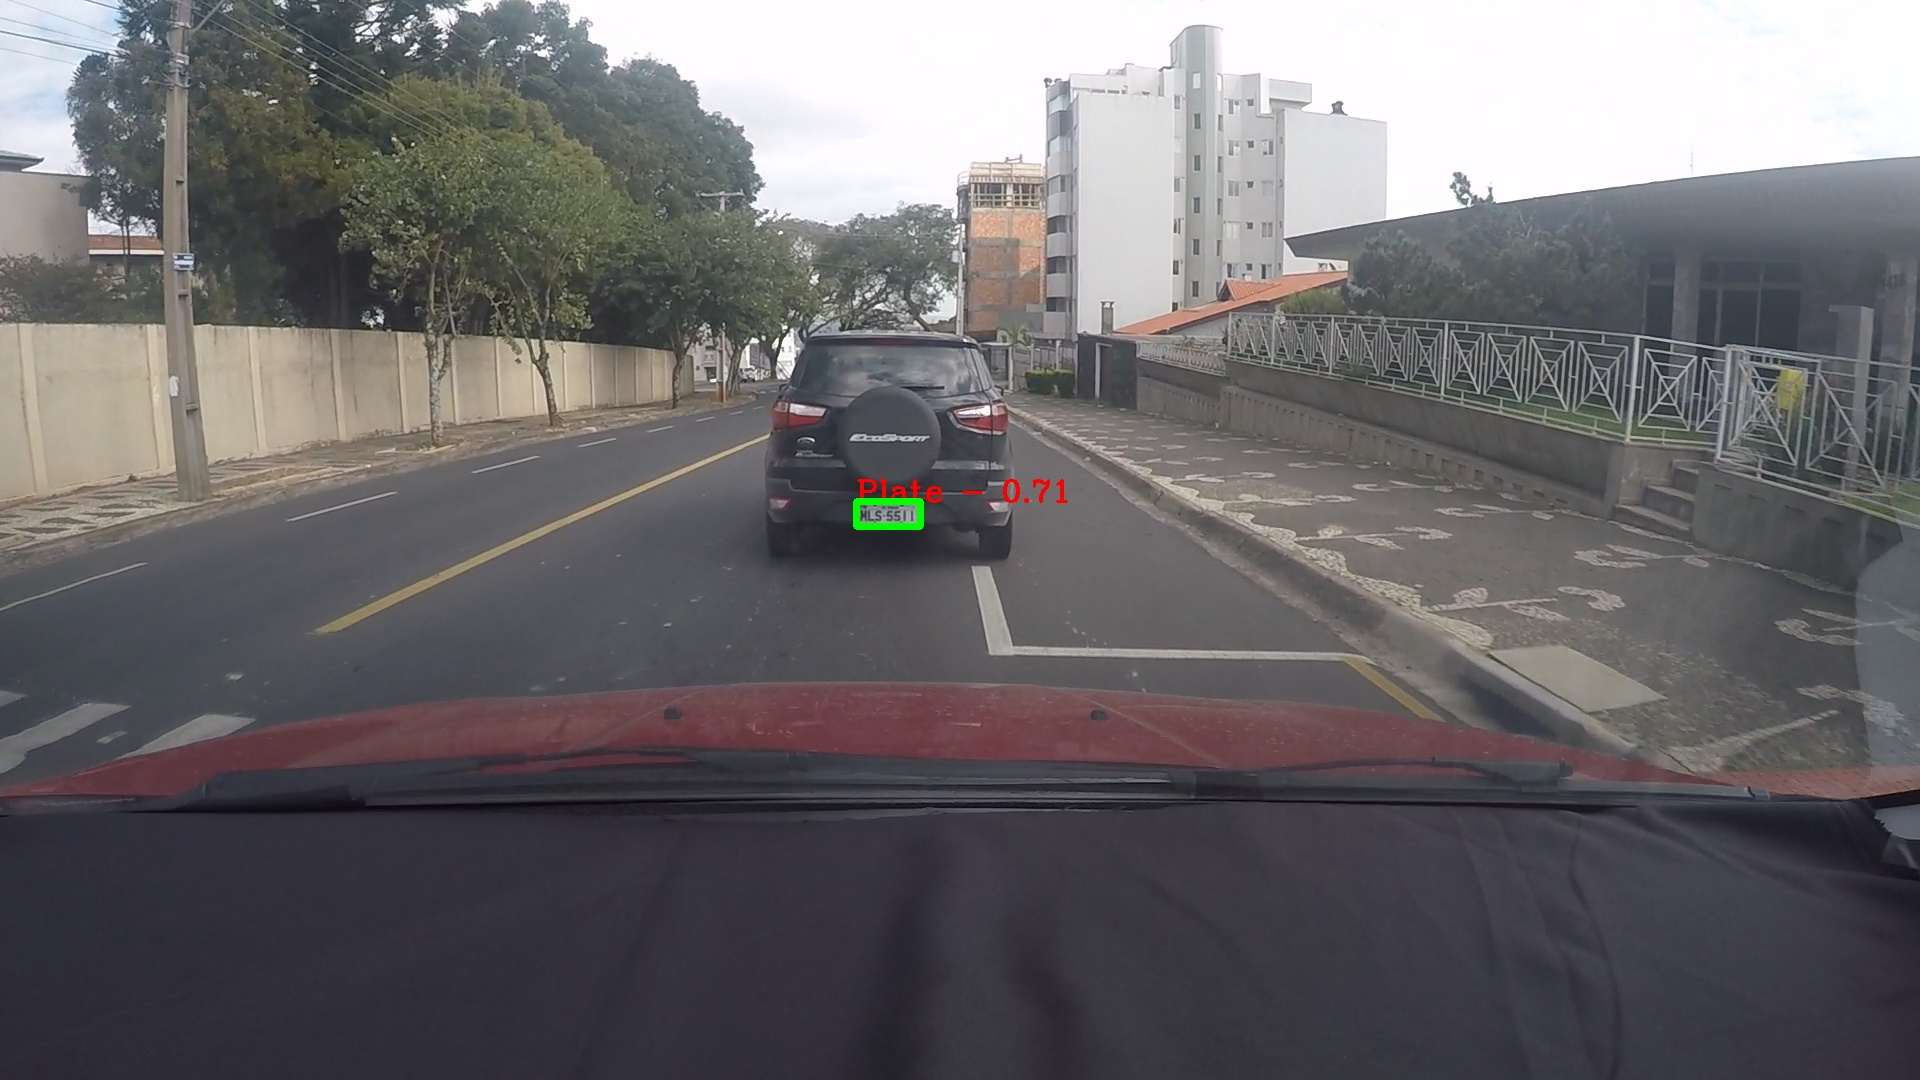

In [32]:
import cv2
from ultralytics import YOLO

# Load YOLOv8 model (ensure the path is correct for your model)
model = YOLO('/Users/coutinhonobre/Projects/yolo/tcc_deteccao_placas/runs/detect/train7/weights/best.pt')

# Load the image (ensure the path is correct for your image)
img = cv2.imread('/Users/coutinhonobre/Projects/yolo/tcc_deteccao_placas/dataset/test/images/track0091[02].png')

# Perform object detection
results = model.predict(img, verbose=False)

# Get image dimensions
height, width, _ = img.shape

# Process detection results
for result in results:
    names = result.names
    for box in result.boxes:
        # Extract box coordinates and class information
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        x1, y1, x2, y2 = map(int, (x1, y1, x2, y2))
        cls = int(box.cls[0])
        confidence = round(float(box.conf), 2)

        # Get class name
        class_name = names[cls]

        # Calculate and print normalized coordinates
        bbox_width = x2 - x1
        bbox_height = y2 - y1
        x_center = (x1 + bbox_width / 2) / width
        y_center = (y1 + bbox_height / 2) / height
        normalized_width = bbox_width / width
        normalized_height = bbox_height / height
        
        print(f'Normalized Coords: {x_center:.6f}, {y_center:.6f}, {normalized_width:.6f}, {normalized_height:.6f} - Class: {class_name} - Confidence: {confidence}')

        # Draw bounding box and label on image
        cv2.putText(img, f'{class_name} - {confidence}', (x1, y1), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 2)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 5)

# Display the result in the Jupyter Notebook
from IPython.display import Image
Image(cv2.imencode('.jpg', img)[1].tobytes())


## Though, the confusion matrix shows us that it also sees a lot of plates that do not exist - but at least it does not miss that many:

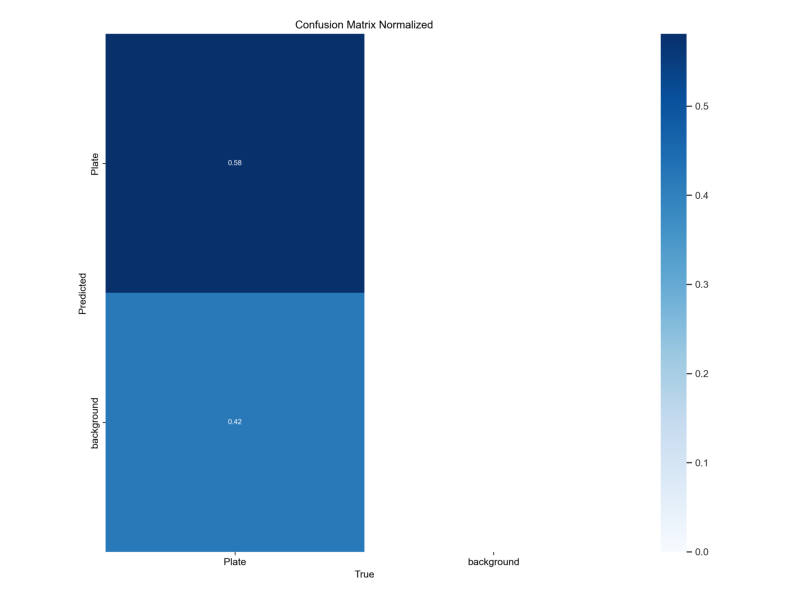

In [41]:
view_image_in_line("/Users/coutinhonobre/Projects/yolo/tcc_deteccao_placas/runs/detect/train7/confusion_matrix_normalized.png")

# Improving Training Results

In [2]:
# unzip downloaded dataset to `./datasets`
dataset = '/Users/coutinhonobre/Projects/yolo/tcc_deteccao_placas/dataset/data.yml'

# load a model
# backbone = YOLO("yolov8n.yaml")  # build a new model from scratch
backbone_small = YOLO("yolov8s.pt")  # load a pre-trained model (recommended for training)

In [3]:
# Use the model
results_medium = backbone_small.train(data=dataset, epochs=30, imgsz=640, workers=2, device='mps')  # train the model

New https://pypi.org/project/ultralytics/8.2.68 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.27 🚀 Python-3.9.6 torch-2.1.2 MPS (Apple M1 Pro)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/Users/coutinhonobre/Projects/yolo/tcc_deteccao_placas/dataset/data.yml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=mps, workers=2, project=None, name=train15, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, em

train: Scanning /Users/coutinhonobre/Projects/yolo/tcc_deteccao_placas/dataset/train/labels.cache... 1800 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1800/1800 [00:00<?, ?it/s]
val: Scanning /Users/coutinhonobre/Projects/yolo/tcc_deteccao_placas/dataset/valid/labels.cache... 900 images, 0 backgrounds, 0 corrupt: 100%|██████████| 900/900 [00:00<?, ?it/s]


Plotting labels to runs/detect/train15/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train15
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G      1.353      3.053     0.9683         18        640: 100%|██████████| 113/113 [11:28<00:00,  6.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/29 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   3%|▎         | 1/29 [00:21<10:06, 21.67s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   7%|▋         | 2/29 [00:34<07:28, 16.63s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  10%|█         | 3/29 [00:47<06:26, 14.85s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 4/29 [01:02<06:09, 14.77s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  17%|█▋        | 5/29 [01:15<05:46, 14.43s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  21%|██        | 6/29 [01:27<05:07, 13.36s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  24%|██▍       | 7/29 [01:42<05:06, 13.93s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  28%|██▊       | 8/29 [01:57<04:57, 14.17s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  31%|███       | 9/29 [02:13<04:54, 14.74s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  34%|███▍      | 10/29 [02:25<04:28, 14.12s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 11/29 [02:42<04:28, 14.92s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  41%|████▏     | 12/29 [02:54<03:58, 14.06s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  45%|████▍     | 13/29 [03:07<03:37, 13.60s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  48%|████▊     | 14/29 [03:19<03:17, 13.17s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  52%|█████▏    | 15/29 [03:29<02:53, 12.40s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [03:42<02:41, 12.39s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  59%|█████▊    | 17/29 [03:55<02:30, 12.52s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▏   | 18/29 [04:08<02:19, 12.64s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  66%|██████▌   | 19/29 [04:24<02:17, 13.72s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  69%|██████▉   | 20/29 [04:34<01:53, 12.66s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  72%|███████▏  | 21/29 [04:50<01:50, 13.78s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  76%|███████▌  | 22/29 [05:03<01:34, 13.54s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  79%|███████▉  | 23/29 [05:17<01:20, 13.44s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  83%|████████▎ | 24/29 [05:26<01:01, 12.37s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 25/29 [05:37<00:47, 11.76s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  90%|████████▉ | 26/29 [05:53<00:39, 13.14s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [06:40<00:00, 13.79s/it]


                   all        900        905   6.22e-05     0.0011   3.16e-05   3.16e-06

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30         0G      1.203     0.7146     0.8993         12        640: 100%|██████████| 113/113 [11:52<00:00,  6.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/29 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   3%|▎         | 1/29 [00:13<06:22, 13.66s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   7%|▋         | 2/29 [00:25<05:40, 12.60s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  10%|█         | 3/29 [00:36<05:13, 12.04s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 4/29 [00:52<05:36, 13.44s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  17%|█▋        | 5/29 [01:01<04:45, 11.90s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  21%|██        | 6/29 [01:11<04:16, 11.14s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [03:25<00:00,  7.09s/it]


                   all        900        905     0.0236     0.0188    0.00359    0.00263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30         0G      1.185     0.6594     0.9002          9        640: 100%|██████████| 113/113 [11:20<00:00,  6.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  21%|██        | 6/29 [00:34<02:13,  5.82s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  52%|█████▏    | 15/29 [01:38<01:46,  7.62s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  69%|██████▉   | 20/29 [02:20<01:13,  8.15s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [03:22<00:00,  6.97s/it]


                   all        900        905     0.0484      0.053    0.00546    0.00338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30         0G      1.128     0.5979     0.8867         14        640: 100%|██████████| 113/113 [10:53<00:00,  5.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [02:54<00:00,  6.02s/it]


                   all        900        905      0.057     0.0541      0.012    0.00696

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30         0G        1.1     0.5495     0.8901         11        640: 100%|██████████| 113/113 [10:40<00:00,  5.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [02:48<00:00,  5.82s/it]


                   all        900        905      0.157      0.138     0.0533     0.0386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30         0G      1.029     0.5285     0.8692         12        640: 100%|██████████| 113/113 [10:46<00:00,  5.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [02:44<00:00,  5.69s/it]


                   all        900        905      0.341      0.267      0.182      0.113

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30         0G      1.062      0.537     0.8747         16        640: 100%|██████████| 113/113 [10:48<00:00,  5.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [02:41<00:00,  5.56s/it]


                   all        900        905     0.0667     0.0674      0.014    0.00915

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30         0G      1.013     0.4995     0.8653          8        640: 100%|██████████| 113/113 [11:02<00:00,  5.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [02:53<00:00,  5.99s/it]


                   all        900        905     0.0475     0.0453     0.0109    0.00514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30         0G     0.9757     0.4866     0.8623         10        640: 100%|██████████| 113/113 [10:42<00:00,  5.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [02:42<00:00,  5.59s/it]


                   all        900        905      0.153      0.141     0.0518     0.0364

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30         0G     0.9359     0.4652     0.8575         12        640: 100%|██████████| 113/113 [10:40<00:00,  5.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [02:36<00:00,  5.41s/it]


                   all        900        905     0.0986     0.0994     0.0277     0.0193

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30         0G     0.9555     0.4739     0.8543         10        640: 100%|██████████| 113/113 [10:44<00:00,  5.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [02:36<00:00,  5.40s/it]


                   all        900        905      0.284      0.268      0.154      0.106

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30         0G     0.9306     0.4542     0.8536         15        640: 100%|██████████| 113/113 [10:55<00:00,  5.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [02:43<00:00,  5.65s/it]


                   all        900        905      0.272      0.272      0.132     0.0945

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30         0G     0.8855     0.4419     0.8468         10        640: 100%|██████████| 113/113 [10:54<00:00,  5.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [02:51<00:00,  5.92s/it]


                   all        900        905     0.0781     0.0895     0.0217     0.0153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30         0G     0.8819     0.4306     0.8418         15        640: 100%|██████████| 113/113 [10:53<00:00,  5.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [02:48<00:00,  5.79s/it]


                   all        900        905      0.179      0.171     0.0734     0.0518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30         0G     0.8956     0.4367     0.8477         15        640: 100%|██████████| 113/113 [10:48<00:00,  5.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [02:30<00:00,  5.18s/it]


                   all        900        905      0.198      0.185     0.0697     0.0477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30         0G     0.8719      0.424     0.8438         11        640: 100%|██████████| 113/113 [10:53<00:00,  5.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [02:31<00:00,  5.23s/it]


                   all        900        905      0.452      0.436      0.296      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30         0G     0.8745     0.4204     0.8416         14        640: 100%|██████████| 113/113 [10:44<00:00,  5.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [02:33<00:00,  5.29s/it]


                   all        900        905      0.598      0.592      0.499      0.335

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30         0G     0.8668      0.422     0.8429         18        640: 100%|██████████| 113/113 [10:40<00:00,  5.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [02:29<00:00,  5.15s/it]


                   all        900        905      0.573      0.523      0.472      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30         0G     0.8396     0.4098     0.8431         13        640: 100%|██████████| 113/113 [10:40<00:00,  5.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [02:36<00:00,  5.40s/it]


                   all        900        905      0.509      0.496      0.333      0.232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30         0G     0.8365     0.3998     0.8415         11        640: 100%|██████████| 113/113 [10:53<00:00,  5.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [02:36<00:00,  5.39s/it]


                   all        900        905      0.431      0.413       0.26      0.181
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30         0G     0.8352     0.4012     0.8463          8        640: 100%|██████████| 113/113 [11:00<00:00,  5.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [02:46<00:00,  5.76s/it]


                   all        900        905     0.0408     0.0387     0.0086    0.00688

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30         0G     0.8519     0.4073     0.8424          7        640: 100%|██████████| 113/113 [10:37<00:00,  5.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [02:41<00:00,  5.55s/it]


                   all        900        905      0.218      0.203     0.0893     0.0632

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30         0G     0.8082     0.3975     0.8485          8        640: 100%|██████████| 113/113 [10:43<00:00,  5.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [02:35<00:00,  5.38s/it]


                   all        900        905       0.39      0.356      0.227      0.158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30         0G     0.7919     0.3784     0.8435          8        640: 100%|██████████| 113/113 [11:04<00:00,  5.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [02:44<00:00,  5.68s/it]


                   all        900        905      0.497      0.464      0.323      0.225

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30         0G     0.7884     0.3762     0.8446          8        640: 100%|██████████| 113/113 [10:39<00:00,  5.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [02:48<00:00,  5.80s/it]


                   all        900        905      0.195      0.181     0.0649     0.0446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30         0G     0.7848     0.3823      0.844          8        640: 100%|██████████| 113/113 [10:26<00:00,  5.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [02:34<00:00,  5.33s/it]


                   all        900        905      0.444      0.427      0.269      0.187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30         0G     0.7649      0.369     0.8325          8        640: 100%|██████████| 113/113 [10:36<00:00,  5.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [02:38<00:00,  5.46s/it]


                   all        900        905      0.559      0.524      0.409      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30         0G     0.7463     0.3527     0.8387          8        640: 100%|██████████| 113/113 [10:45<00:00,  5.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [02:38<00:00,  5.47s/it]


                   all        900        905      0.502      0.467       0.33       0.23

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30         0G      0.731     0.3394       0.83          8        640: 100%|██████████| 113/113 [12:51<00:00,  6.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [03:02<00:00,  6.30s/it]


                   all        900        905      0.422      0.394      0.245       0.17

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30         0G     0.7301     0.3434     0.8262          8        640: 100%|██████████| 113/113 [12:37<00:00,  6.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [02:54<00:00,  6.03s/it]


                   all        900        905      0.495      0.465      0.319      0.224

30 epochs completed in 6.956 hours.
Optimizer stripped from runs/detect/train15/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train15/weights/best.pt, 22.5MB

Validating runs/detect/train15/weights/best.pt...
Ultralytics YOLOv8.1.27 🚀 Python-3.9.6 torch-2.1.2 MPS (Apple M1 Pro)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [02:25<00:00,  5.02s/it]


                   all        900        905      0.596      0.591      0.499      0.335
Speed: 4.4ms preprocess, 78.7ms inference, 0.0ms loss, 17.2ms postprocess per image
Results saved to runs/detect/train15


In [4]:
# pick pre-trained model
np2_model = YOLO('runs/detect/train13/weights/best.pt')

In [5]:
# Evaluate the model's performance on the validation set
results = np2_model.val()

Ultralytics YOLOv8.1.27 🚀 Python-3.9.6 torch-2.1.2 CPU (Apple M1 Pro)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /Users/coutinhonobre/Projects/yolo/tcc_deteccao_placas/dataset/valid/labels.cache... 900 images, 0 backgrounds, 0 corrupt: 100%|██████████| 900/900 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 57/57 [04:17<00:00,  4.51s/it]


                   all        900        905       0.99      0.961      0.993       0.63
Speed: 0.3ms preprocess, 245.7ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/val6


# License Plate Detection

In [3]:
import ast
import cv2 as cv
import easyocr
from glob import glob
import numpy as np
import pandas as pd
import string
from ultralytics import YOLO

/Users/coutinhonobre/Projects/yolo/tcc_deteccao_placas/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


#### As seen during the training - the model, just using the COCO training weights, is very capable of detecting cars, trucks and buses. But number plates seem to be a bit harder - the model often confuses street signs or just basic backgound noise as a car registration plate. The positive is that it rarely misses a plate.

In [10]:
# regular pre-trained yolov8 model for car recognition
coco_model = 'yolov8n.pt'
# yolov8 model trained to detect number plates
np_model = 'runs/detect/train15/weights/best.pt'

In [11]:
# read in test video paths
videos = glob('video/*.mp4')
print(videos)

['video/traffic.mp4', 'video/road.mp4']


In [15]:
import cv2
from ultralytics import YOLO
from IPython.display import display, Image
import matplotlib.pyplot as plt

def process_image(model_path, image_path):
    # Carregar o modelo YOLOv8
    model = YOLO(model_path)

    # Carregar a imagem
    img = cv2.imread(image_path)

    # Realizar a predição
    resultado = model.predict(img, verbose=False)

    # Obter as dimensões da imagem
    height, width, _ = img.shape

    # Processar os resultados da detecção
    for obj in resultado:
        names = obj.names
        for item in obj.boxes:
            x1, y1, x2, y2 = item.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            cls = int(item.cls[0])

            name_class = names[cls]
            percent_obj = round(float(item.conf), 2)

            # Calcular a largura e a altura da caixa delimitadora
            bbox_width = x2 - x1
            bbox_height = y2 - y1

            # Normalizar as coordenadas
            x_center = (x1 + bbox_width / 2) / width
            y_center = (y1 + bbox_height / 2) / height
            normalized_width = bbox_width / width
            normalized_height = bbox_height / height

            print(f'Coordenadas Normalizadas: {x_center:.6f}, {y_center:.6f}, {normalized_width:.6f}, {normalized_height:.6f} - Classe: {name_class} - Percentual: {percent_obj}')

            # Desenhar a caixa delimitadora e o rótulo na imagem
            cv2.putText(img, f'{name_class} - {percent_obj}%', (x1, y1), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 2)
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 5)

    # Converter a imagem de BGR (formato do OpenCV) para RGB (formato do Matplotlib)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Exibir a imagem resultante no Jupyter Notebook
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()


Coordenadas Normalizadas: 0.472917, 0.414352, 0.042708, 0.030556 - Classe: Plate - Percentual: 0.84


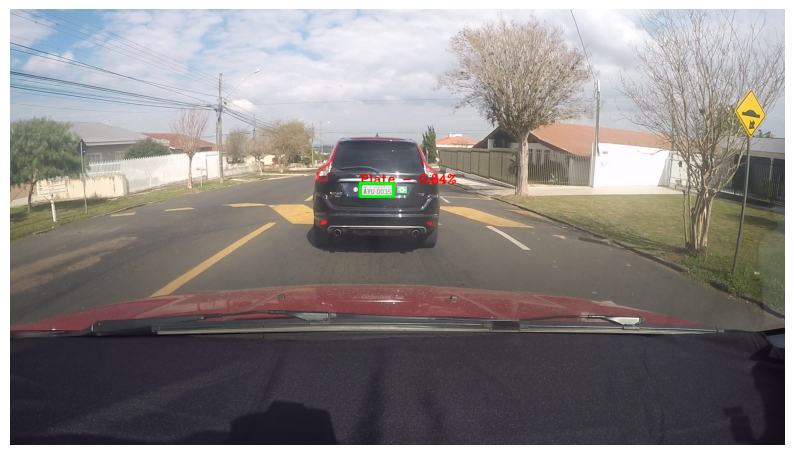

In [8]:
model_path = '/Users/coutinhonobre/Projects/yolo/tcc_deteccao_placas/runs/detect/train15/weights/best.pt'
image_path = '/Users/coutinhonobre/Projects/yolo/tcc_deteccao_placas/dataset/valid/images/track0061[01].png'
process_image(model_path, image_path)

## STEP 1 Implementing the Car Detection

Get the bounding boxes of all vehicles in your video recording with prediction confidence score and object tracking ID

Coordenadas Normalizadas: 0.184375, 0.474537, 0.150000, 0.419444 - Classe: motorcycle - Percentual: 0.61
Coordenadas Normalizadas: 0.188542, 0.387500, 0.158333, 0.399074 - Classe: person - Percentual: 0.55
Coordenadas Normalizadas: 0.180208, 0.538889, 0.135417, 0.287037 - Classe: motorcycle - Percentual: 0.48
Coordenadas Normalizadas: 0.221354, 0.391204, 0.095833, 0.406481 - Classe: person - Percentual: 0.43


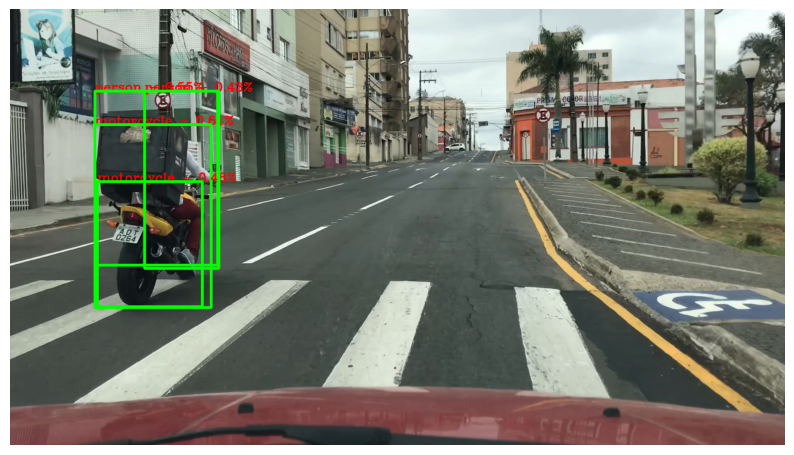

In [19]:

image_mercosul = '/Users/coutinhonobre/Projects/yolo/tcc_deteccao_placas/dataset/valid/images/track0090[24].png'
process_image(coco_model, image_mercosul)

## STEP 2 Implementing the License Plate Detection

Use the bounding box for each vehicle and use the number plate detector model to try to find the corresponding plate within in the confinement of those boxes.

Coordenadas Normalizadas: 0.153385, 0.513426, 0.039062, 0.047222 - Classe: Plate - Percentual: 0.38


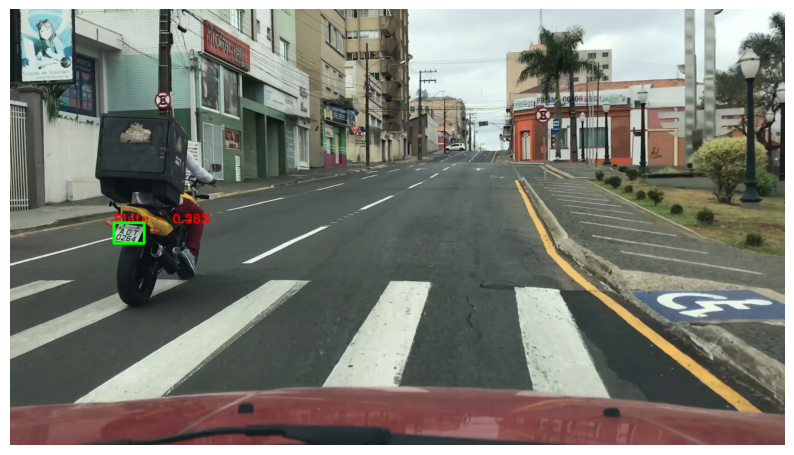

In [18]:
image_mercosul = '/Users/coutinhonobre/Projects/yolo/tcc_deteccao_placas/dataset/valid/images/track0090[24].png'
process_image(np_model, image_mercosul)

## STEP 3 Preprocess License Plates

In [46]:
import cv2
from ultralytics import YOLO

def crop_and_save_images(model_path, image_path):
    # Carregar o modelo YOLOv8
    model = YOLO(model_path)

    # Carregar a imagem
    img = cv2.imread(image_path)

    # Realizar a predição
    resultado = model.predict(img, verbose=False)

    # Processar os resultados da detecção
    for obj in resultado:
        names = obj.names
        for idx, item in enumerate(obj.boxes):
            x1, y1, x2, y2 = item.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            cls = int(item.cls[0])

            name_class = names[cls]

            # Recortar a imagem com base na caixa delimitadora
            cropped_img = img[y1:y2, x1:x2]
            cropped_img_path = f'cropped_{name_class}_{idx}.png'
            cv2.imwrite(cropped_img_path, cropped_img)
            print(f'Imagem recortada salva como: {cropped_img_path}')

In [47]:
image_path = '/Users/coutinhonobre/Projects/yolo/tcc_deteccao_placas/dataset/valid/images/track0090[24].png'
crop_and_save_images(np_model, image_path)

Imagem recortada salva como: cropped_Plate_0.png


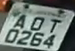

In [23]:
Image(filename='cropped_plate_0.png')


In [48]:
import cv2
from ultralytics import YOLO

def crop_and_save_images_grayscale_thresh(model_path, image_path, threshold_value=128):
    # Carregar o modelo YOLOv8
    model = YOLO(model_path)

    # Carregar a imagem
    img = cv2.imread(image_path)

    # Converter a imagem para escala de cinza
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Aplicar a limiarização
    _, thresh_img = cv2.threshold(gray_img, threshold_value, 255, cv2.THRESH_BINARY)

    # Realizar a predição
    resultado = model.predict(img, verbose=False)

    # Processar os resultados da detecção
    for obj in resultado:
        names = obj.names
        for idx, item in enumerate(obj.boxes):
            x1, y1, x2, y2 = item.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            cls = int(item.cls[0])

            name_class = names[cls]

            # Recortar a imagem limiarizada com base na caixa delimitadora
            cropped_img = thresh_img[y1:y2, x1:x2]
            cropped_img_path = f'cropped_thresh_{name_class}_{idx}.png'
            cv2.imwrite(cropped_img_path, cropped_img)
            print(f'Imagem recortada salva como: {cropped_img_path}')


In [49]:
# Exemplo de uso
image_path = '/Users/coutinhonobre/Projects/yolo/tcc_deteccao_placas/dataset/valid/images/track0090[24].png'
crop_and_save_images_grayscale_thresh(np_model, image_path)

Imagem recortada salva como: cropped_thresh_Plate_0.png


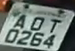

In [60]:
from PIL import Image
from IPython.display import display

# Abra a imagem
image = Image.open('cropped_Plate_0.png')

# Exiba a imagem na célula
display(image)


# STEP 4 Read License Plates

In [29]:
reader = easyocr.Reader(['pt'], gpu=True)

In [61]:
def read_license_plate(license_plate_crop):
    detections = reader.readtext(license_plate_crop)

    for detection in detections:
        bbox, text, score = detection

        text = text.upper().replace(' ', '')
        
        return text, score

    return None, None

In [62]:
read_license_plate('cropped_plate_0.png')

('685', 0.8541865390141226)

Text: 685, Confidence: 0.85


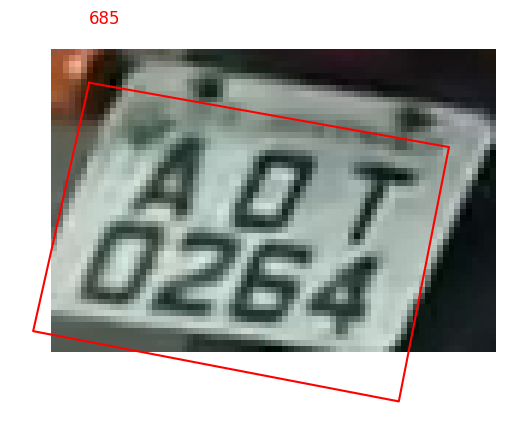

In [63]:
import easyocr
import matplotlib.pyplot as plt

# Initialize the OCR reader for Portuguese (Brazil)
reader = easyocr.Reader(['pt'], gpu=True)

# Path to your image file
image_path = 'cropped_plate_0.png'

# Perform OCR on the image
results = reader.readtext(image_path)

# Print the results
for result in results:
    print(f'Text: {result[1]}, Confidence: {result[2]:.2f}')

# Optionally, visualize the results
# Load and display the image
image = plt.imread(image_path)
plt.imshow(image)
plt.axis('off')

# Plot the bounding boxes and text
for result in results:
    bbox, text, confidence = result
    plt.plot([bbox[0][0], bbox[1][0], bbox[2][0], bbox[3][0], bbox[0][0]],
             [bbox[0][1], bbox[1][1], bbox[2][1], bbox[3][1], bbox[0][1]], 'r')
    plt.text(bbox[0][0], bbox[0][1] - 10, text, color='red', fontsize=12, backgroundcolor='white')

plt.show()


Text: 68, Confidence: 0.15


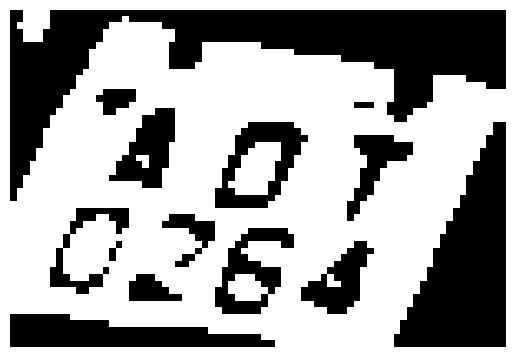

In [64]:
import cv2
import easyocr
import matplotlib.pyplot as plt

# Função para pré-processamento da imagem
def preprocess_image(image_path):
    # Carregar imagem
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    
    # Converter para tons de cinza
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Aplicar filtro de Gaussian Blur para reduzir ruído
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Binarizar a imagem
    _, binary_image = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    return binary_image

# Caminho da imagem
image_path = 'cropped_Plate_0.png'

# Pré-processar a imagem
processed_image = preprocess_image(image_path)

# Salvar a imagem pré-processada para visualização (opcional)
cv2.imwrite('processed_image.jpg', processed_image)

# Inicializar o leitor OCR para Português (Brasil)
reader = easyocr.Reader(['pt'], gpu=True)

# Realizar OCR na imagem pré-processada
results = reader.readtext(processed_image)

# Exibir resultados
for result in results:
    print(f'Text: {result[1]}, Confidence: {result[2]:.2f}')

# Visualizar a imagem pré-processada
plt.imshow(processed_image, cmap='gray')
plt.axis('off')
plt.show()


In [65]:
import pytesseract
from PIL import Image

# Especificar o caminho para o executável do Tesseract (use o caminho retornado pelo `which tesseract`)
pytesseract.pytesseract.tesseract_cmd = '/opt/homebrew/bin/tesseract'

# Caminho da imagem
image_path = 'cropped_Plate_0.png'

# Carregar imagem
image = Image.open(image_path)

# Realizar OCR na imagem em português
text = pytesseract.image_to_string(image, lang='por')

# Exibir o texto reconhecido
print(text)


In [66]:
import pytesseract
from PIL import Image

# Especificar o caminho para o executável do Tesseract
pytesseract.pytesseract.tesseract_cmd = '/opt/homebrew/bin/tesseract'

# Caminho da imagem
image_path = 'cropped_Plate_0.png'

# Carregar imagem
image = Image.open(image_path)

# Mostrar a imagem para verificar
image.show()

# Realizar OCR na imagem em português
try:
    text = pytesseract.image_to_string(image, lang='por')
    print("Texto reconhecido:")
    print(text)
except pytesseract.TesseractError as e:
    print(f"Erro ao executar o Tesseract: {e}")


Texto reconhecido:



In [67]:
import pytesseract
from PIL import Image
import cv2
import numpy as np

# Caminho da imagem
image_path = 'cropped_Plate_0.png'

# Carregar imagem com OpenCV
image = cv2.imread(image_path)

# Converter para tons de cinza
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar binarização (thresholding)
_, binary_image = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Salvar imagem binarizada para visualização (opcional)
cv2.imwrite('binary_image.jpg', binary_image)

# Converter de volta para PIL para usar com pytesseract
pil_image = Image.fromarray(binary_image)

# Realizar OCR na imagem binarizada em português
pytesseract.pytesseract.tesseract_cmd = '/opt/homebrew/bin/tesseract'
text = pytesseract.image_to_string(pil_image, lang='por')

# Exibir o texto reconhecido
print("Texto reconhecido:")
print(text)


Texto reconhecido:

